#  Training Deep Neural Networks

### Import Libraries

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

2023-10-06 09:03:34.530551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Vanishing/Exploding Gradients Problem

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

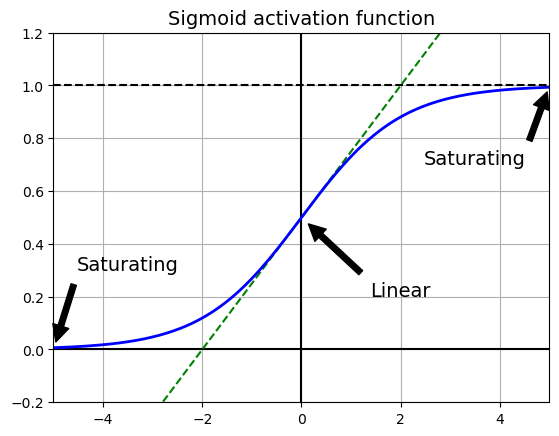

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### Xavier and He Initialization

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [6]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### Nonsaturating Activation Functions

#### Leaky ReLU

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

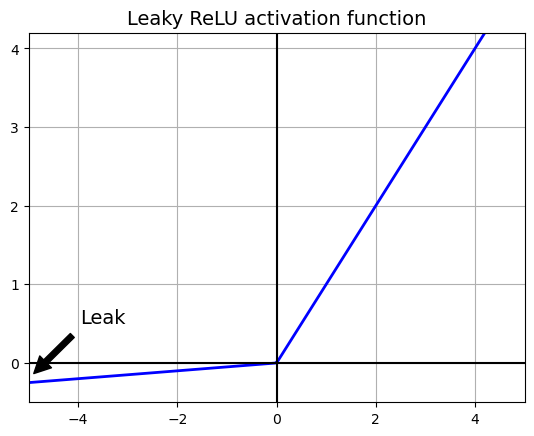

In [8]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [9]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

2023-10-06 09:07:17.052792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2648 - accuracy: 0.6178 - val_loss: 0.8693 - val_accuracy: 0.7154
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7821 - accuracy: 0.7485 - val_loss: 0.6964 - val_accuracy: 0.7786
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6693 - accuracy: 0.7838 - val_loss: 0.6300 - val_accuracy: 0.7954
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6112 - accuracy: 0.8007 - val_loss: 0.5778 - val_accuracy: 0.8108
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5740 - accuracy: 0.8106 - val_loss: 0.5479 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5474 - accuracy: 0.8175 - val_loss: 0.5258 - val_accuracy: 0.8264
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5273 - accuracy: 0.8225 - val_loss: 0.5085 - val_accuracy:

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3159 - accuracy: 0.6049 - val_loss: 0.9123 - val_accuracy: 0.7148
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8132 - accuracy: 0.7332 - val_loss: 0.7271 - val_accuracy: 0.7622
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6934 - accuracy: 0.7723 - val_loss: 0.6552 - val_accuracy: 0.7912
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6301 - accuracy: 0.7949 - val_loss: 0.5968 - val_accuracy: 0.8074
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5887 - accuracy: 0.8071 - val_loss: 0.5621 - val_accuracy: 0.8188
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5586 - accuracy: 0.8142 - val_loss: 0.5367 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5359 - accuracy: 0.8214 - val_loss: 0.5153 - val_accuracy:

#### ELU

In [19]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

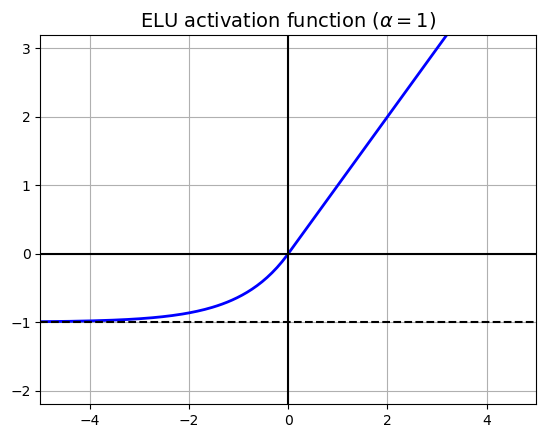

In [20]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [21]:
keras.layers.Dense(10, activation="elu")

#### SELU

In [22]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [23]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

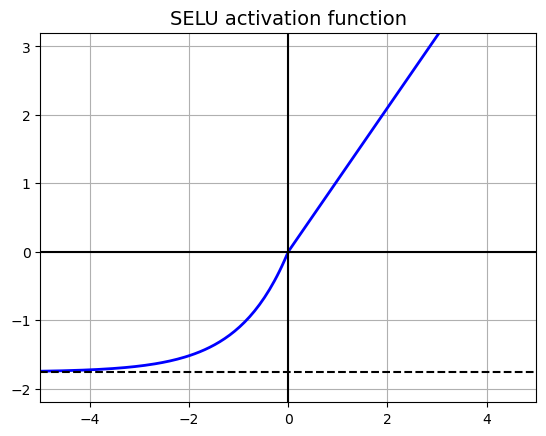

In [24]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [25]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [26]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [30]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [31]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 14ms/step - loss: 1.3520 - accuracy: 0.4639 - val_loss: 0.9621 - val_accuracy: 0.6266
Epoch 2/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.9375 - accuracy: 0.6499 - val_loss: 0.7268 - val_accuracy: 0.7266
Epoch 3/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.7294 - accuracy: 0.7384 - val_loss: 0.7379 - val_accuracy: 0.7450
Epoch 4/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.7169 - accuracy: 0.7306 - val_loss: 0.6376 - val_accuracy: 0.7692
Epoch 5/5
1719/1719 [==============================] - 30s 18ms/step - loss: 0.6008 - accuracy: 0.7795 - val_loss: 0.5714 - val_accuracy: 0.8014


In [32]:
np.random.seed(42)
tf.random.set_seed(42)

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [35]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 23s 12ms/step - loss: 1.9138 - accuracy: 0.2541 - val_loss: 1.5970 - val_accuracy: 0.3664
Epoch 2/5
1719/1719 [==============================] - 21s 12ms/step - loss: 1.5124 - accuracy: 0.3630 - val_loss: 1.6322 - val_accuracy: 0.3448
Epoch 3/5
1719/1719 [==============================] - 22s 13ms/step - loss: 1.1965 - accuracy: 0.4980 - val_loss: 0.9447 - val_accuracy: 0.6116
Epoch 4/5
1719/1719 [==============================] - 25s 15ms/step - loss: 0.8942 - accuracy: 0.6352 - val_loss: 0.7920 - val_accuracy: 0.6898
Epoch 5/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.8173 - accuracy: 0.6914 - val_loss: 0.7405 - val_accuracy: 0.7306


### Batch Normalization

#### Implementing Batch Normalization with Keras

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_215 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_216 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [38]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [39]:
#bn1.updates #deprecated

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [41]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8906 - accuracy: 0.7038 - val_loss: 0.5658 - val_accuracy: 0.8150
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5889 - accuracy: 0.7975 - val_loss: 0.4804 - val_accuracy: 0.8422
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5282 - accuracy: 0.8181 - val_loss: 0.4443 - val_accuracy: 0.8566
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4881 - accuracy: 0.8297 - val_loss: 0.4212 - val_accuracy: 0.8618
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4621 - accuracy: 0.8379 - val_loss: 0.4050 - val_accuracy: 0.8664
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4427 - accuracy: 0.8446 - val_loss: 0.3920 - val_accuracy: 0.8690
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4289 - accuracy: 0.8495 - val_loss: 0.3818 - val_accur

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [44]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0326 - accuracy: 0.6711 - val_loss: 0.6729 - val_accuracy: 0.7860
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6766 - accuracy: 0.7797 - val_loss: 0.5552 - val_accuracy: 0.8164
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5947 - accuracy: 0.8021 - val_loss: 0.4989 - val_accuracy: 0.8372
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5428 - accuracy: 0.8166 - val_loss: 0.4644 - val_accuracy: 0.8448
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5107 - accuracy: 0.8264 - val_loss: 0.4414 - val_accuracy: 0.8506
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4880 - accuracy: 0.8335 - val_loss: 0.4234 - val_accuracy: 0.8556
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4704 - accuracy: 0.8390 - val_loss: 0.4096 - val_accuracy:

### Gradient Clipping

In [45]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [46]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers

In [47]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [48]:
X_train_A.shape

(43986, 28, 28)

In [49]:
X_train_B.shape

(200, 28, 28)

In [50]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [51]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [52]:
tf.random.set_seed(42)
np.random.seed(42)

In [53]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [54]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [55]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5716 - accuracy: 0.8126 - val_loss: 0.3884 - val_accuracy: 0.8627
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3554 - accuracy: 0.8770 - val_loss: 0.3283 - val_accuracy: 0.8822
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3192 - accuracy: 0.8892 - val_loss: 0.3013 - val_accuracy: 0.8956
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3006 - accuracy: 0.8959 - val_loss: 0.2855 - val_accuracy: 0.9006
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2878 - accuracy: 0.9001 - val_loss: 0.2753 - val_accuracy: 0.9038
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2785 - accuracy: 0.9042 - val_loss: 0.2704 - val_accuracy: 0.9046
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2703 - accuracy: 0.9073 - val_loss: 0.2656 - val_accuracy:

In [56]:
model_A.save("my_model_A.h5")

In [57]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [58]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [59]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 40ms/step - loss: 0.8393 - accuracy: 0.5650 - val_loss: 0.4812 - val_accuracy: 0.7789
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.4338 - accuracy: 0.8250 - val_loss: 0.3674 - val_accuracy: 0.8722
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3275 - accuracy: 0.9200 - val_loss: 0.3002 - val_accuracy: 0.9108
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2645 - accuracy: 0.9300 - val_loss: 0.2554 - val_accuracy: 0.9331
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2223 - accuracy: 0.9400 - val_loss: 0.2229 - val_accuracy: 0.9473
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.1903 - accuracy: 0.9600 - val_loss: 0.1994 - val_accuracy: 0.9554
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.1677 - accuracy: 0.9700 - val_loss: 0.1809 - val_accuracy: 0.9615
Epoch 8/20
7/7 [===========

In [60]:
model_B.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_227 (Dense)           (None, 300)               235500    
                                                                 
 dense_228 (Dense)           (None, 100)               30100     
                                                                 
 dense_229 (Dense)           (None, 50)                5050      
                                                                 
 dense_230 (Dense)           (None, 50)                2550      
                                                                 
 dense_231 (Dense)           (None, 50)                2550      
                                                                 
 dense_232 (Dense)           (None, 1)                

In [61]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [62]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [63]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [64]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 37ms/step - loss: 2.1805 - accuracy: 0.2300 - val_loss: 2.0772 - val_accuracy: 0.2231
Epoch 2/4
7/7 [==============================] - 0s 18ms/step - loss: 1.9913 - accuracy: 0.2650 - val_loss: 1.8961 - val_accuracy: 0.2414
Epoch 3/4
7/7 [==============================] - 0s 17ms/step - loss: 1.8114 - accuracy: 0.2900 - val_loss: 1.7320 - val_accuracy: 0.2657
Epoch 4/4
7/7 [==============================] - 0s 15ms/step - loss: 1.6490 - accuracy: 0.3100 - val_loss: 1.5787 - val_accuracy: 0.2911
Epoch 1/16
7/7 [==============================] - 1s 68ms/step - loss: 1.2683 - accuracy: 0.3650 - val_loss: 0.9110 - val_accuracy: 0.5213
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.6978 - accuracy: 0.6100 - val_loss: 0.5418 - val_accuracy: 0.7110
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.4096 - accuracy: 0.8150 - val_loss: 0.3730 - val_accuracy: 0.8499
Epoch 4/16
7/7 [===============

In [65]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9820


[0.08444797247648239, 0.9819999933242798]

In [66]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9895


[0.0806678757071495, 0.9894999861717224]

In [67]:
(100 - 97.05) / (100 - 99.40)

4.916666666666718

### Faster Optimizer

#### Momentum optimization 

In [68]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

#### Nesterov Accelerated Gradient

In [69]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad 

In [70]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

#### RMSProp 

In [71]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#### Adam Optimization 

In [72]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Adamax Optimization 

In [73]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Nadam Optimization

In [74]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Learning Rate Scheduling

#### Power Scheduling 

In [75]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [76]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [77]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4868 - accuracy: 0.8288 - val_loss: 0.3956 - val_accuracy: 0.8646
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8664 - val_loss: 0.3674 - val_accuracy: 0.8724
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.8777 - val_loss: 0.3696 - val_accuracy: 0.8656
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3248 - accuracy: 0.8846 - val_loss: 0.3440 - val_accuracy: 0.8830
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3099 - accuracy: 0.8902 - val_loss: 0.3390 - val_accuracy: 0.8804
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2964 - accuracy: 0.8946 - val_loss: 0.3382 - val_accuracy: 0.8832
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2864 - accuracy: 0.8975 - val_loss: 0.3323 - val_accuracy:

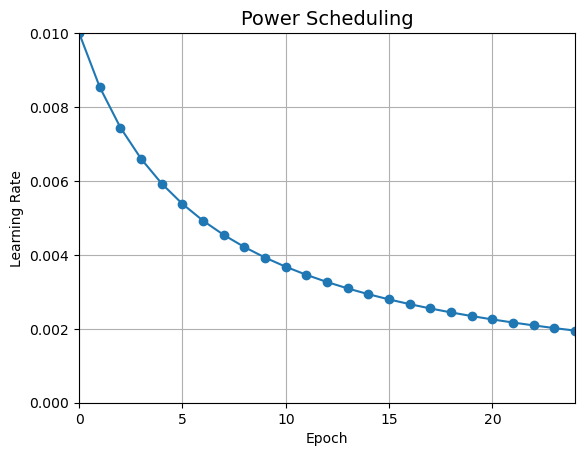

In [78]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Exponential Scheduling

In [79]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [80]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [81]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [82]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8453 - accuracy: 0.7578 - val_loss: 0.7845 - val_accuracy: 0.7882 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6629 - accuracy: 0.7975 - val_loss: 0.6164 - val_accuracy: 0.8342 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6541 - accuracy: 0.8065 - val_loss: 0.6919 - val_accuracy: 0.8192 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5586 - accuracy: 0.8341 - val_loss: 0.4806 - val_accuracy: 0.8516 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4892 - accuracy: 0.8472 - val_loss: 0.4938 - val_accuracy: 0.8526 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4492 - accuracy: 0.8581 - val_loss: 0.4891 - val_accuracy: 0.8566 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

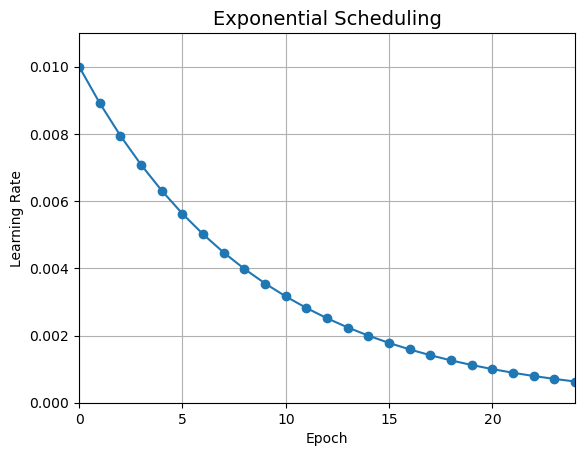

In [83]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [84]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [85]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8194 - accuracy: 0.7604 - val_loss: 0.8656 - val_accuracy: 0.7654 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6270 - accuracy: 0.8056 - val_loss: 0.5482 - val_accuracy: 0.8308 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.5945 - accuracy: 0.8184 - val_loss: 0.6454 - val_accuracy: 0.8308 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 18s 10ms/step - loss: 0.5190 - accuracy: 0.8373 - val_loss: 0.4807 - val_accuracy: 0.8428 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4806 - accuracy: 0.8481 - val_loss: 0.4340 - val_accuracy: 0.8564 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4244 - accuracy: 0.8639 - val_loss: 0.4257 - val_accuracy: 0.8694 - lr: 0.0050
Epoch 7/25
1719/1719 [=============================

In [86]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

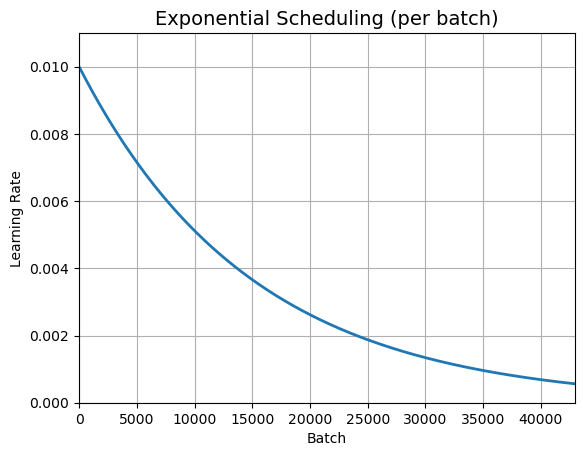

In [87]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

#### Piecewise Constant Scheduling

In [88]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [89]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [90]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 4ms/step - loss: 0.8873 - accuracy: 0.7463 - val_loss: 0.9987 - val_accuracy: 0.6984 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8678 - accuracy: 0.7511 - val_loss: 1.0129 - val_accuracy: 0.7530 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8641 - accuracy: 0.7460 - val_loss: 1.1032 - val_accuracy: 0.6658 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0151 - accuracy: 0.6631 - val_loss: 1.0165 - val_accuracy: 0.6132 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2019 - accuracy: 0.6196 - val_loss: 1.2833 - val_accuracy: 0.5246 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.9286 - accuracy: 0.6412 - val_loss: 0.8400 - val_accuracy: 0.6726 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 

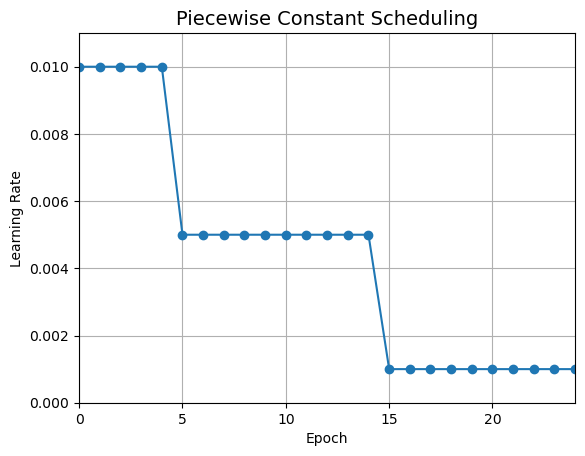

In [91]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Performance Scheduling

In [92]:
tf.random.set_seed(42)
np.random.seed(42)

In [93]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5941 - accuracy: 0.8074 - val_loss: 0.5166 - val_accuracy: 0.8380 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4863 - accuracy: 0.8424 - val_loss: 0.5404 - val_accuracy: 0.8460 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5184 - accuracy: 0.8411 - val_loss: 0.4552 - val_accuracy: 0.8654 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5140 - accuracy: 0.8473 - val_loss: 0.4492 - val_accuracy: 0.8610 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5097 - accuracy: 0.8515 - val_loss: 0.4926 - val_accuracy: 0.8464 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5061 - accuracy: 0.8526 - val_loss: 0.5839 - val_accuracy: 0.8500 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 9s

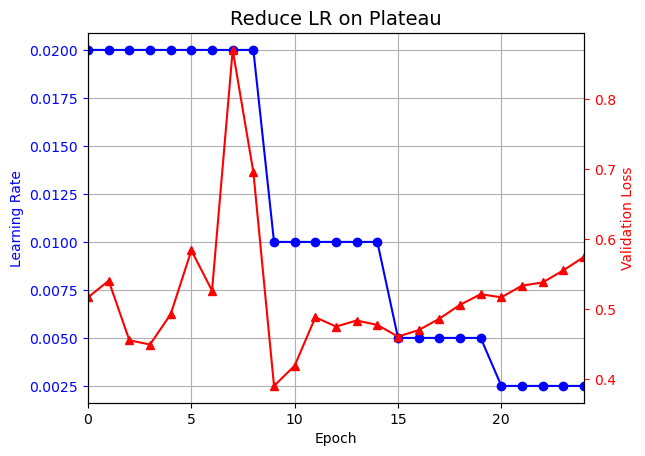

In [94]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [95]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4880 - accuracy: 0.8275 - val_loss: 0.4025 - val_accuracy: 0.8586
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8645 - val_loss: 0.3709 - val_accuracy: 0.8748
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3486 - accuracy: 0.8755 - val_loss: 0.3760 - val_accuracy: 0.8680
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3266 - accuracy: 0.8837 - val_loss: 0.3496 - val_accuracy: 0.8764
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3107 - accuracy: 0.8890 - val_loss: 0.3432 - val_accuracy: 0.8758
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2963 - accuracy: 0.8946 - val_loss: 0.3415 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2859 - accuracy: 0.8979 - val_loss: 0.3346 - val_accuracy:

In [96]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

#### 1Cycle scheduling

In [97]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [98]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.3666


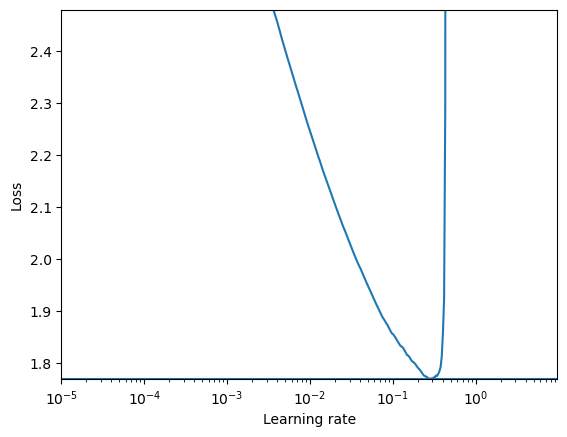

In [99]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [100]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [101]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 6ms/step - loss: 0.6501 - accuracy: 0.7786 - val_loss: 0.4780 - val_accuracy: 0.8400
Epoch 2/25
430/430 [==============================] - 4s 10ms/step - loss: 0.4532 - accuracy: 0.8414 - val_loss: 0.4219 - val_accuracy: 0.8574
Epoch 3/25
430/430 [==============================] - 5s 11ms/step - loss: 0.4090 - accuracy: 0.8554 - val_loss: 0.4066 - val_accuracy: 0.8590
Epoch 4/25
430/430 [==============================] - 4s 10ms/step - loss: 0.3811 - accuracy: 0.8651 - val_loss: 0.3791 - val_accuracy: 0.8708
Epoch 5/25
430/430 [==============================] - 5s 11ms/step - loss: 0.3610 - accuracy: 0.8713 - val_loss: 0.3679 - val_accuracy: 0.8688
Epoch 6/25
430/430 [==============================] - 5s 11ms/step - loss: 0.3425 - accuracy: 0.8780 - val_loss: 0.3636 - val_accuracy: 0.8726
Epoch 7/25
430/430 [==============================] - 5s 11ms/step - loss: 0.3292 - accuracy: 0.8819 - val_loss: 0.3555 - val_accuracy: 0.8744


### Avoiding Overfitting Through Regularization 

####  L1 and  L2 regularization 

In [102]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [103]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 6ms/step - loss: 1.6130 - accuracy: 0.8113 - val_loss: 0.7205 - val_accuracy: 0.8322
Epoch 2/2
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7194 - accuracy: 0.8269 - val_loss: 0.6841 - val_accuracy: 0.8368


In [104]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 1.6685 - accuracy: 0.8117 - val_loss: 0.7230 - val_accuracy: 0.8302
Epoch 2/2
1719/1719 [==============================] - 17s 10ms/step - loss: 0.7211 - accuracy: 0.8276 - val_loss: 0.6862 - val_accuracy: 0.8368


### Dropout

In [105]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 21s 11ms/step - loss: 0.5772 - accuracy: 0.8025 - val_loss: 0.3710 - val_accuracy: 0.8686
Epoch 2/2
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4199 - accuracy: 0.8460 - val_loss: 0.3381 - val_accuracy: 0.8710


### Alpha DropOut 

In [106]:
tf.random.set_seed(42)
np.random.seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 18s 9ms/step - loss: 0.6665 - accuracy: 0.7568 - val_loss: 0.5820 - val_accuracy: 0.8392
Epoch 2/20
1719/1719 [==============================] - 15s 8ms/step - loss: 0.5599 - accuracy: 0.7918 - val_loss: 0.5773 - val_accuracy: 0.8386
Epoch 3/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5235 - accuracy: 0.8068 - val_loss: 0.5066 - val_accuracy: 0.8548
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5075 - accuracy: 0.8129 - val_loss: 0.4585 - val_accuracy: 0.8650
Epoch 5/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4926 - accuracy: 0.8180 - val_loss: 0.4574 - val_accuracy: 0.8626
Epoch 6/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4836 - accuracy: 0.8208 - val_loss: 0.4847 - val_accuracy: 0.8528
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4721 - accuracy: 0.8241 - val_loss: 0.4607 - val_ac

In [108]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4527 - accuracy: 0.8603


[0.45267602801322937, 0.8603000044822693]

In [109]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.3341 - accuracy: 0.8855


[0.33412328362464905, 0.8855272531509399]

In [110]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 6s 4ms/step - loss: 0.4190 - accuracy: 0.8438


### MC Dropout

In [111]:
tf.random.set_seed(42)
np.random.seed(42)

In [112]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [113]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 1s 613ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [114]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.09, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.15, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.11, 0.  , 0.88]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.59, 0.  , 0.2 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.15, 0.  , 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.  , 0.14, 0.  , 0.29]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.72, 0.  , 0.26]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.65, 0.  , 0.32]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.02, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0

In [115]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.22, 0.  , 0.72]],
      dtype=float32)

In [116]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.23, 0.  , 0.26]],
      dtype=float32)

In [117]:
y_pred = np.argmax(y_proba, axis=1)

In [118]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8686

In [119]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [120]:
tf.random.set_seed(42)
np.random.seed(42)

In [121]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [122]:
mc_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_266 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_267 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [123]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [124]:
mc_model.set_weights(model.get_weights())

In [125]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 25ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.2 , 0.  , 0.74]],
      dtype=float32)

### Max norm

In [126]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [127]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4765 - accuracy: 0.8335 - val_loss: 0.3772 - val_accuracy: 0.8604
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3559 - accuracy: 0.8707 - val_loss: 0.3654 - val_accuracy: 0.8684
